In [7]:
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA, NMF

In [8]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X,y = load_mnist('./fashionmnist/')

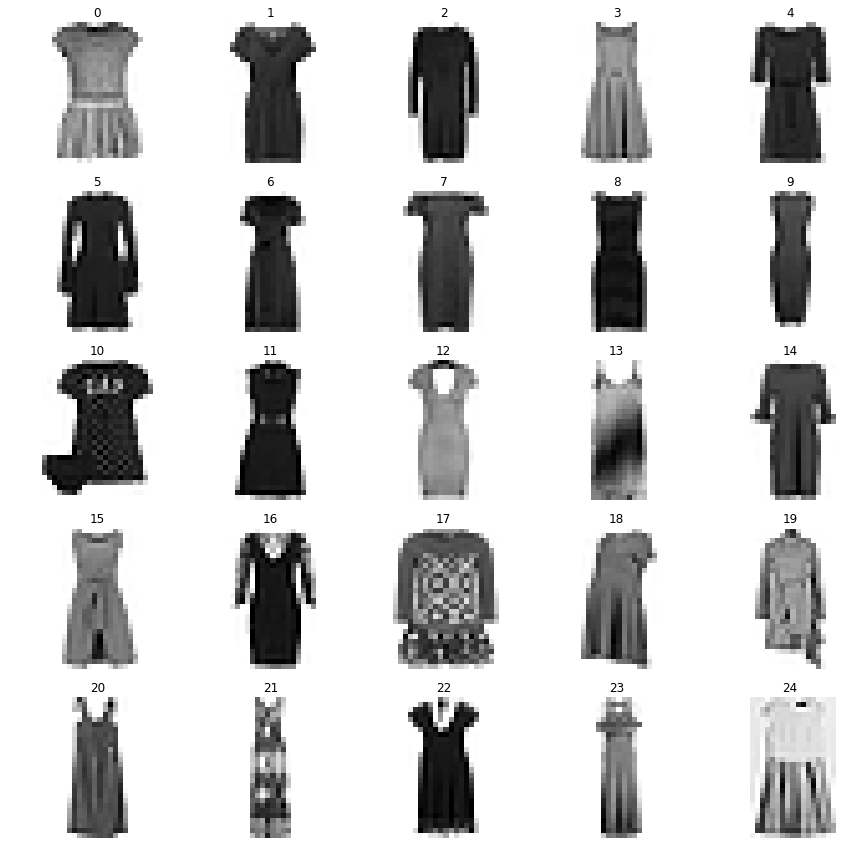

In [9]:
#previously was one cell with for i in range(10):
c = 3 # c = i
X1 = X[y==c] # select class
llength = int(np.sqrt(X.shape[1])) # get length of x,y for reshape

# preapre 25 plots
fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    axs[i].imshow(X1[i].reshape(llength,llength),cmap='gray_r')
    axs[i].set_title(str(i))
    axs[i].axis('off')

#plt.subplots_adjust(wspace=0.3, hspace=0)
    
fname = './images/class-'+str(c)+'-original.png'
plt.savefig(fname)

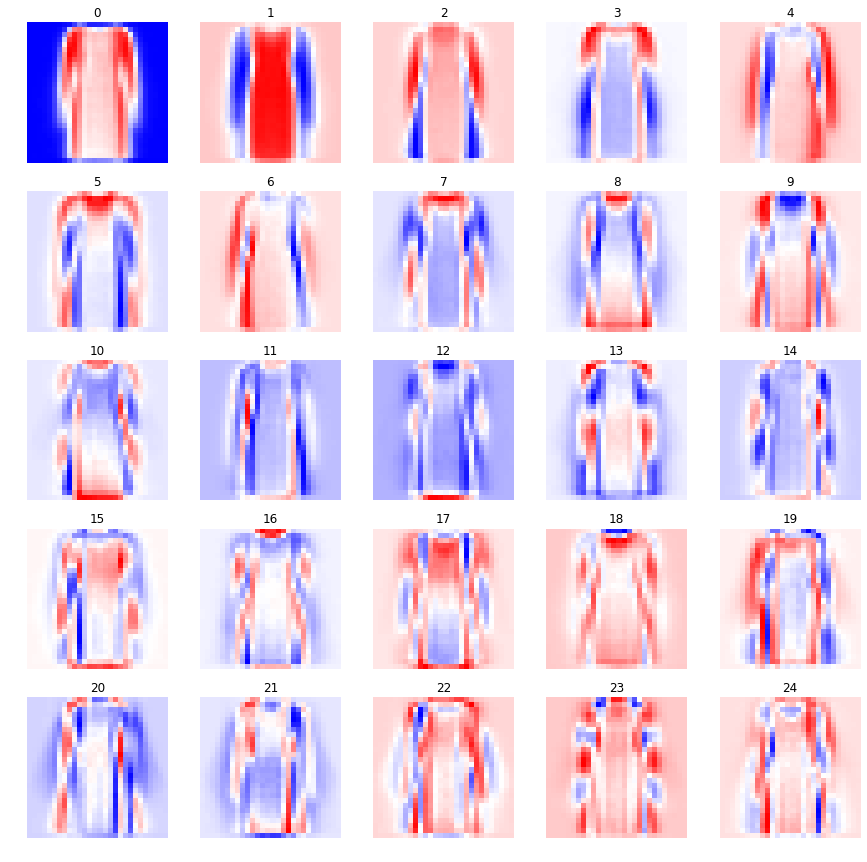

In [11]:
# PCA
n_components=25
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X1)

eigenfaces = pca.components_.reshape((n_components, llength, llength))

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    axs[i].imshow(eigenfaces[i].reshape(llength,llength),cmap='bwr_r')
    axs[i].set_title(str(i))
    axs[i].axis('off')
#plt.subplots_adjust(wspace=0, hspace=0)
fname = './images/class-'+str(c)+'-pca25.png'

plt.savefig(fname)

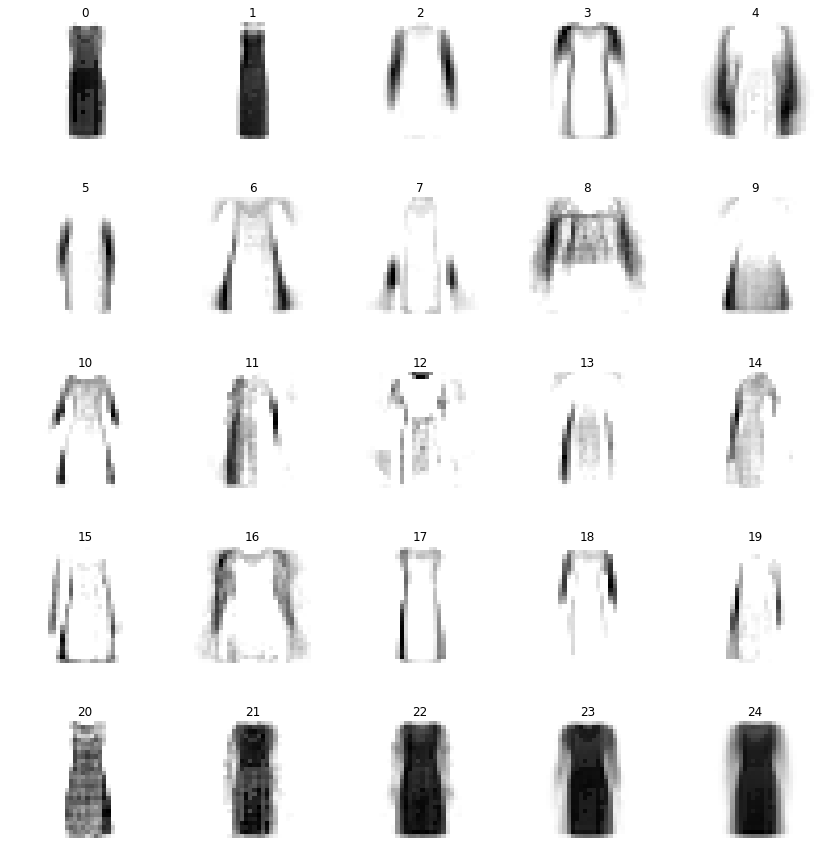

In [12]:
# NMF
nmf = NMF(n_components=n_components,init='nndsvda', tol=5e-3).fit(X1)

nmffaces = nmf.components_.reshape((n_components, llength, llength))

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    axs[i].imshow(nmffaces[i].reshape(llength,llength),cmap='gray_r')
    axs[i].set_title(str(i))
    axs[i].axis('off')


fname = './images/class-'+str(c)+'-nmf25.png'
plt.savefig(fname)

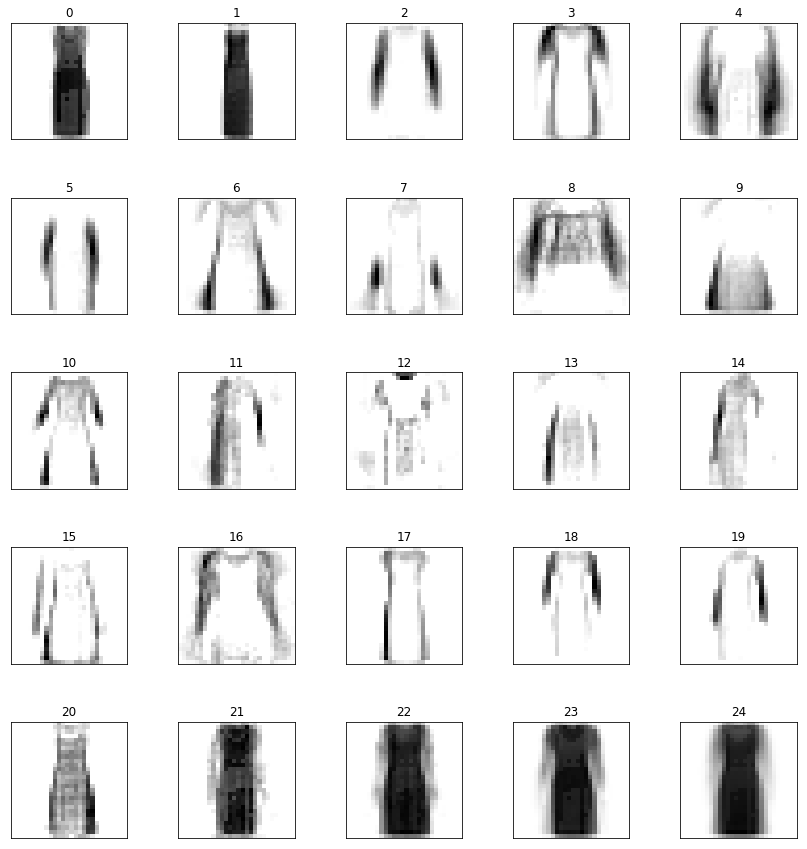

In [13]:
# NMF alternative with bounding box
nmf = NMF(n_components=n_components,init='nndsvda', tol=5e-3).fit(X1)

nmffaces = nmf.components_.reshape((n_components, llength, llength))

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    axs[i].imshow(nmffaces[i].reshape(llength,llength),cmap='gray_r')
    axs[i].set_title(str(i))
#    axs[i].axis('off')
    axs[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    axs[i].tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right=False,      # ticks along the bottom edge are off
        left=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off


fname = './images/class-'+str(c)+'-nmf25.png'
plt.savefig(fname)